In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
mpl.rcParams.update({'font.size': 16})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 16}) 
mpl.rcParams.update({'ytick.labelsize': 16}) 
mpl.rcParams.update({'text.usetex' : False})

In [3]:
ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')


0L

In [4]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [5]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('vertex_z')
    
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    
    if(isMC):
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')
        

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [6]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [7]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('vertex_z')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [8]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [9]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## get data and MC and apply cuts

In [10]:
df = getData(['data.root'])
df = applyCuts(df)



Processed data.root in 0.6 seconds
abs(vertex_z)<25 and and vertex_z!=0 91887  fraction kept: 37.0
0.2 < y < 0.7 91887  fraction kept: 100.0
Q2>150 91887  fraction kept: 100.0
e_pt >10 74519  fraction kept: 81.1


In [11]:
mc = getData(['djangoh.root'])
mc = applyCuts(mc)

altmc = getData(['rapgap.root'])
altmc = applyCuts(altmc)


Processed djangoh.root in 0.9 seconds
abs(vertex_z)<25 and and vertex_z!=0 693298  fraction kept: 96.2
0.2 < y < 0.7 693298  fraction kept: 100.0
Q2>150 693298  fraction kept: 100.0
e_pt >10 571485  fraction kept: 82.4

Processed rapgap.root in 0.8 seconds
abs(vertex_z)<25 and and vertex_z!=0 753543  fraction kept: 96.2
0.2 < y < 0.7 753543  fraction kept: 100.0
Q2>150 753543  fraction kept: 100.0
e_pt >10 623251  fraction kept: 82.7


## plot electron variables (data and MC)

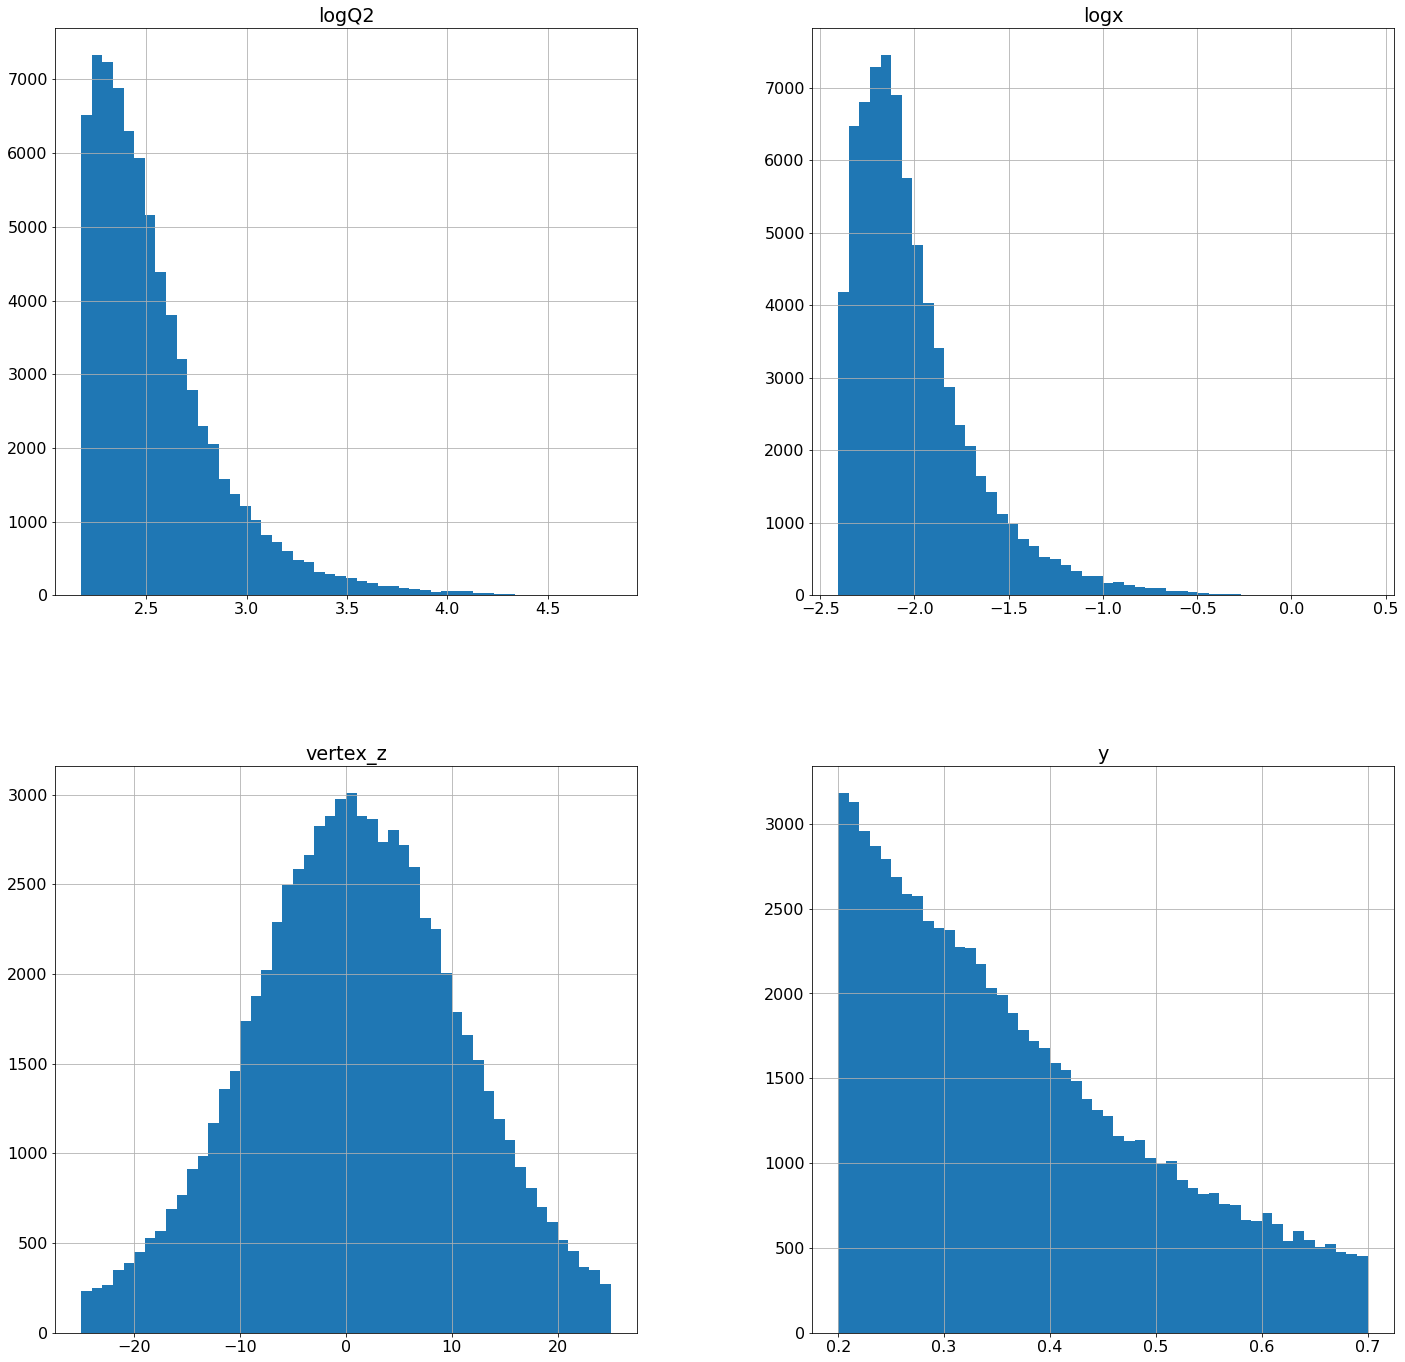

In [12]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

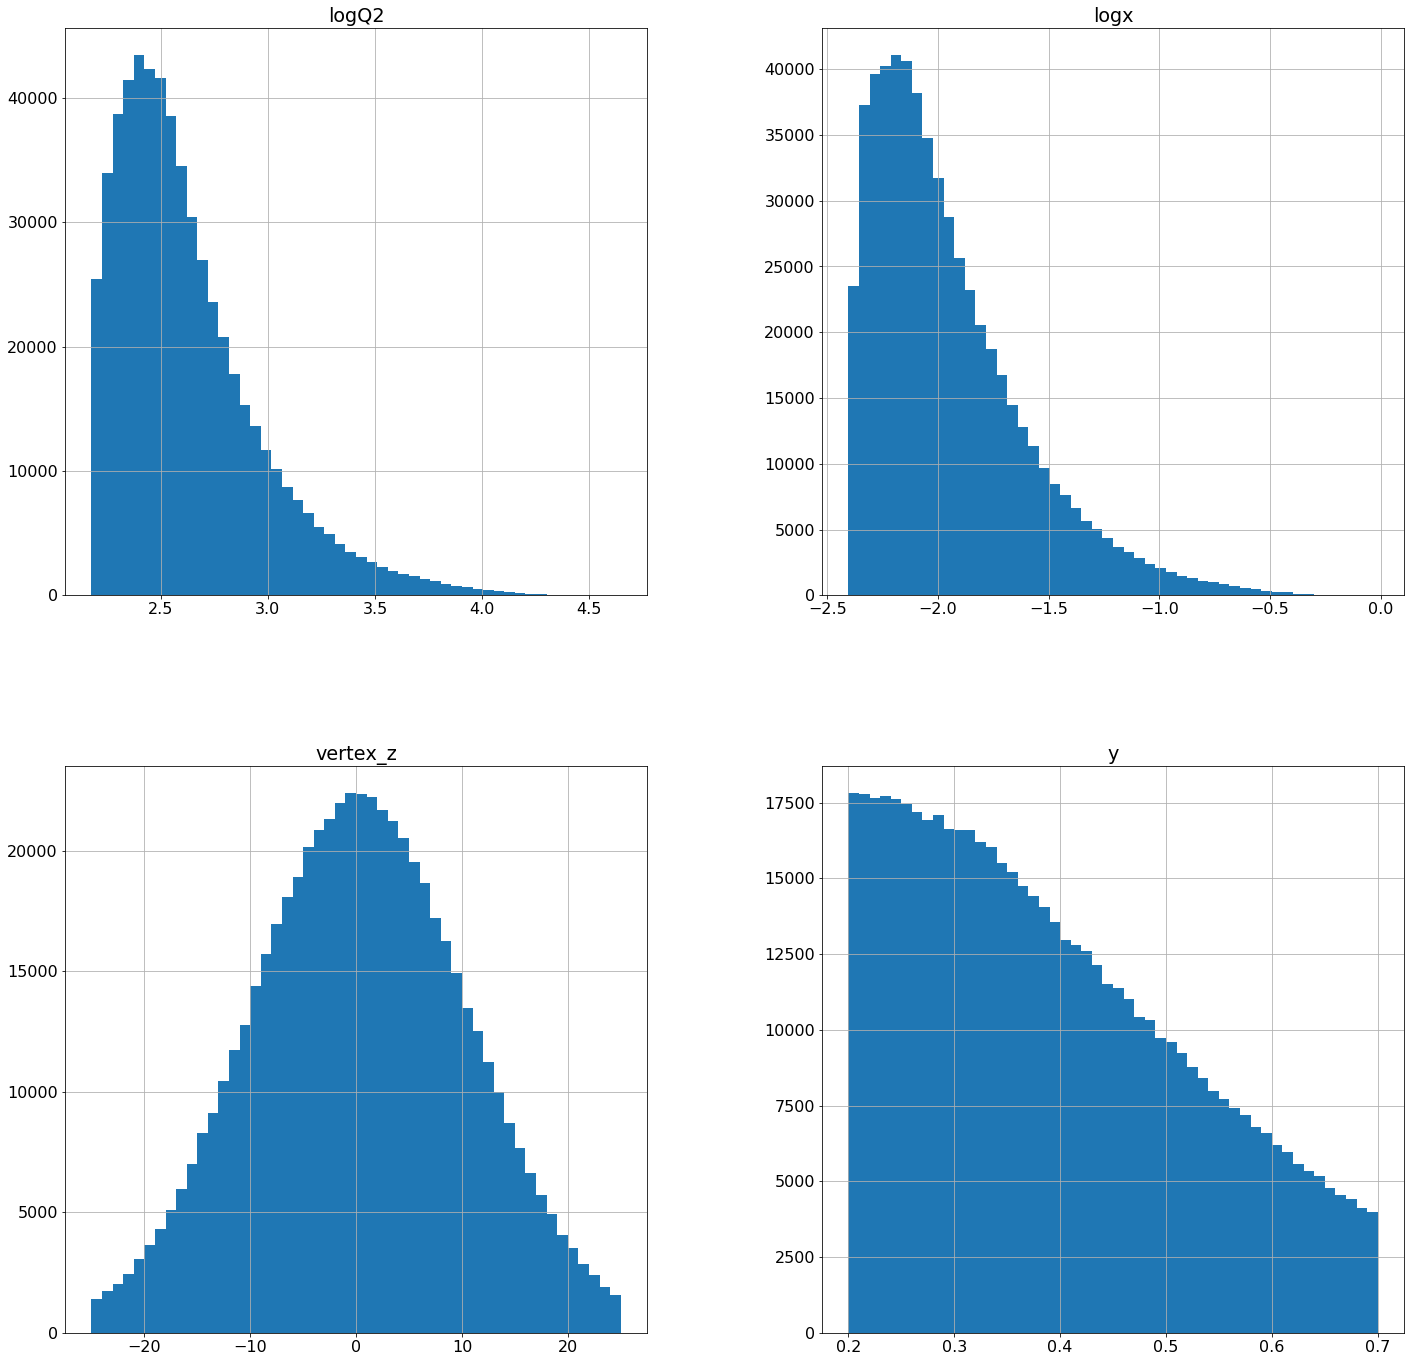

In [13]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

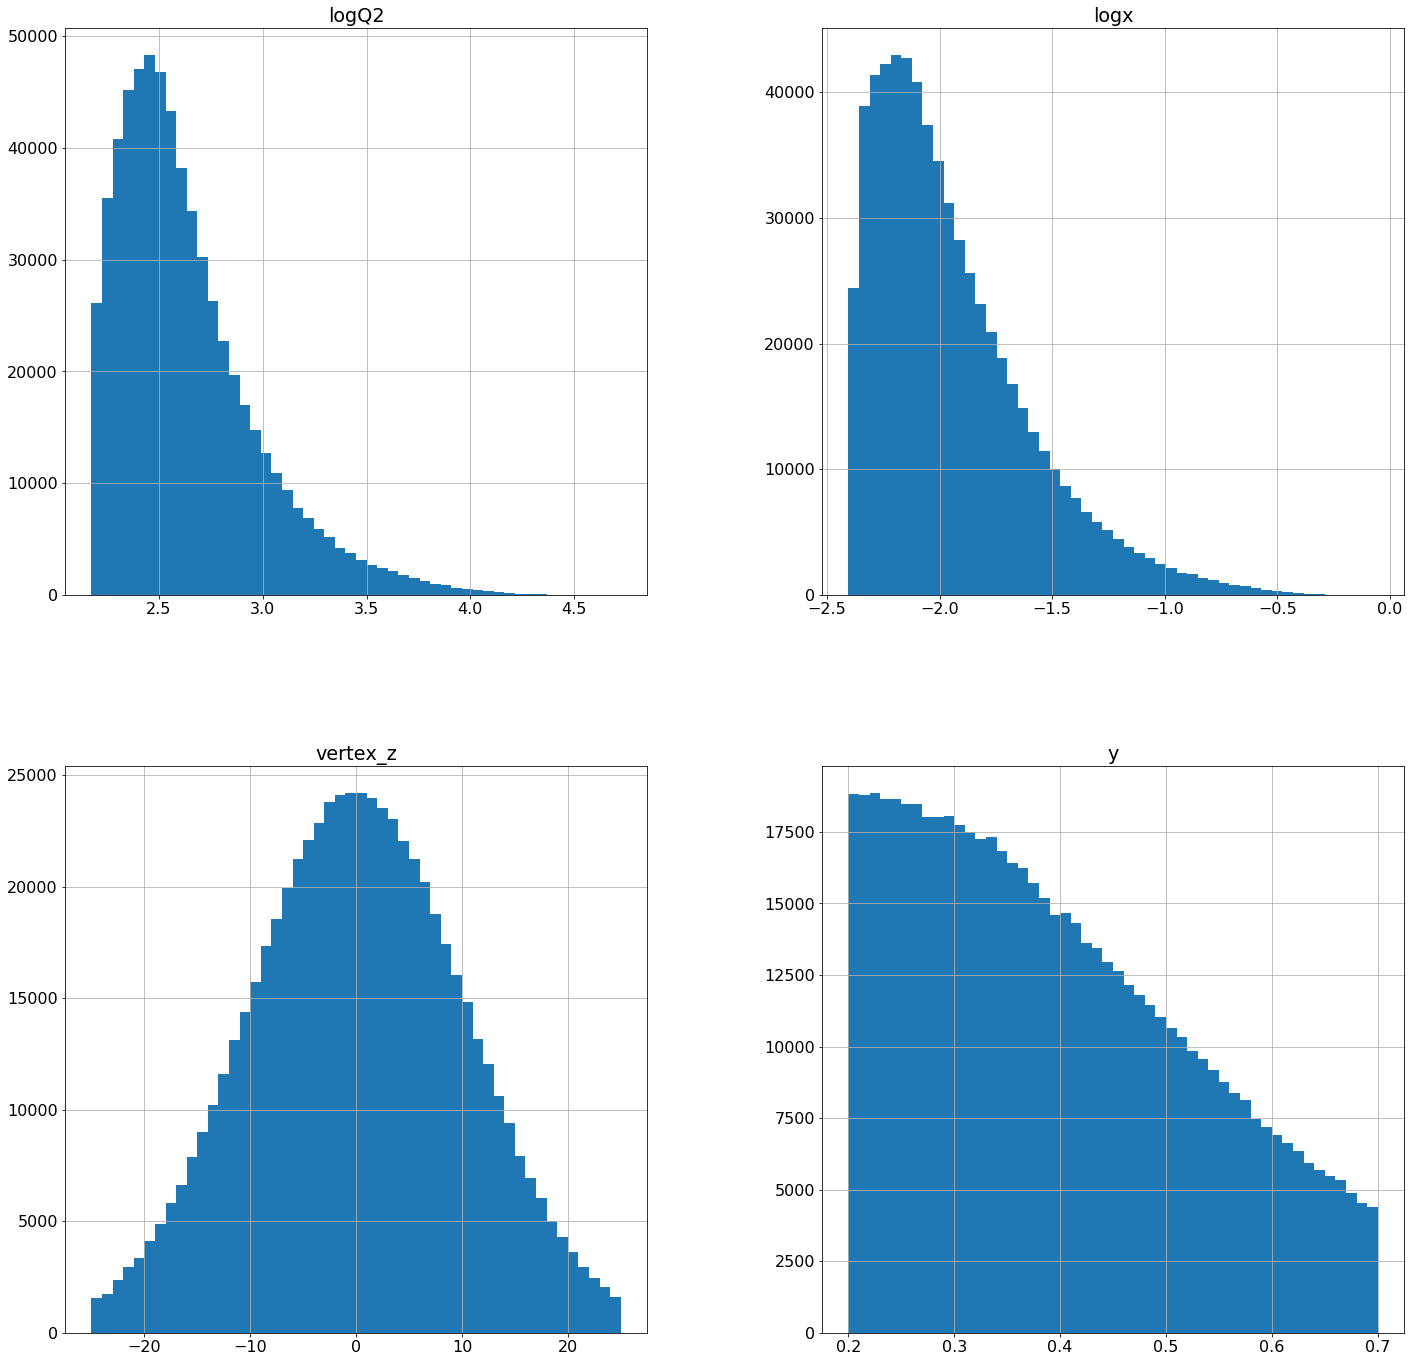

In [14]:
rc('text', usetex=False)
altmc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

## Get jet data and apply selection

In [15]:
df_jet      = getJetData(['data.root'])
df_jet = applyCutsJets(df_jet)


Processed data.root in 9.9 seconds
abs(vertex_z)<25 and and vertex_z!=0 97815  fraction kept: 79.5
0.2 < y < 0.7 97815  fraction kept: 100.0
Q2>150 97815  fraction kept: 100.0
e_pt >10 83827  fraction kept: 85.7
jet_pt>10 55963  fraction kept: 66.8


In [16]:
mc_jet = getJetData(['djangoh.root'],isMC=True)
mc_jet = applyCutsJets(mc_jet, isMC=True)

altmc_jet = getJetData(['rapgap.root'],isMC=True)
altmc_jet = applyCutsJets(altmc_jet, isMC=True)


Processed djangoh.root in 44.0 seconds
abs(vertex_z)<25 and and vertex_z!=0 862653  fraction kept: 96.3
0.2 < y < 0.7 862653  fraction kept: 100.0
Q2>150 862653  fraction kept: 100.0
e_pt >10 742481  fraction kept: 86.1
jet_pt>10 489259  fraction kept: 65.9

Processed rapgap.root in 72.4 seconds
abs(vertex_z)<25 and and vertex_z!=0 890253  fraction kept: 96.4
0.2 < y < 0.7 890253  fraction kept: 100.0
Q2>150 890253  fraction kept: 100.0
e_pt >10 775266  fraction kept: 87.1
jet_pt>10 521316  fraction kept: 67.2


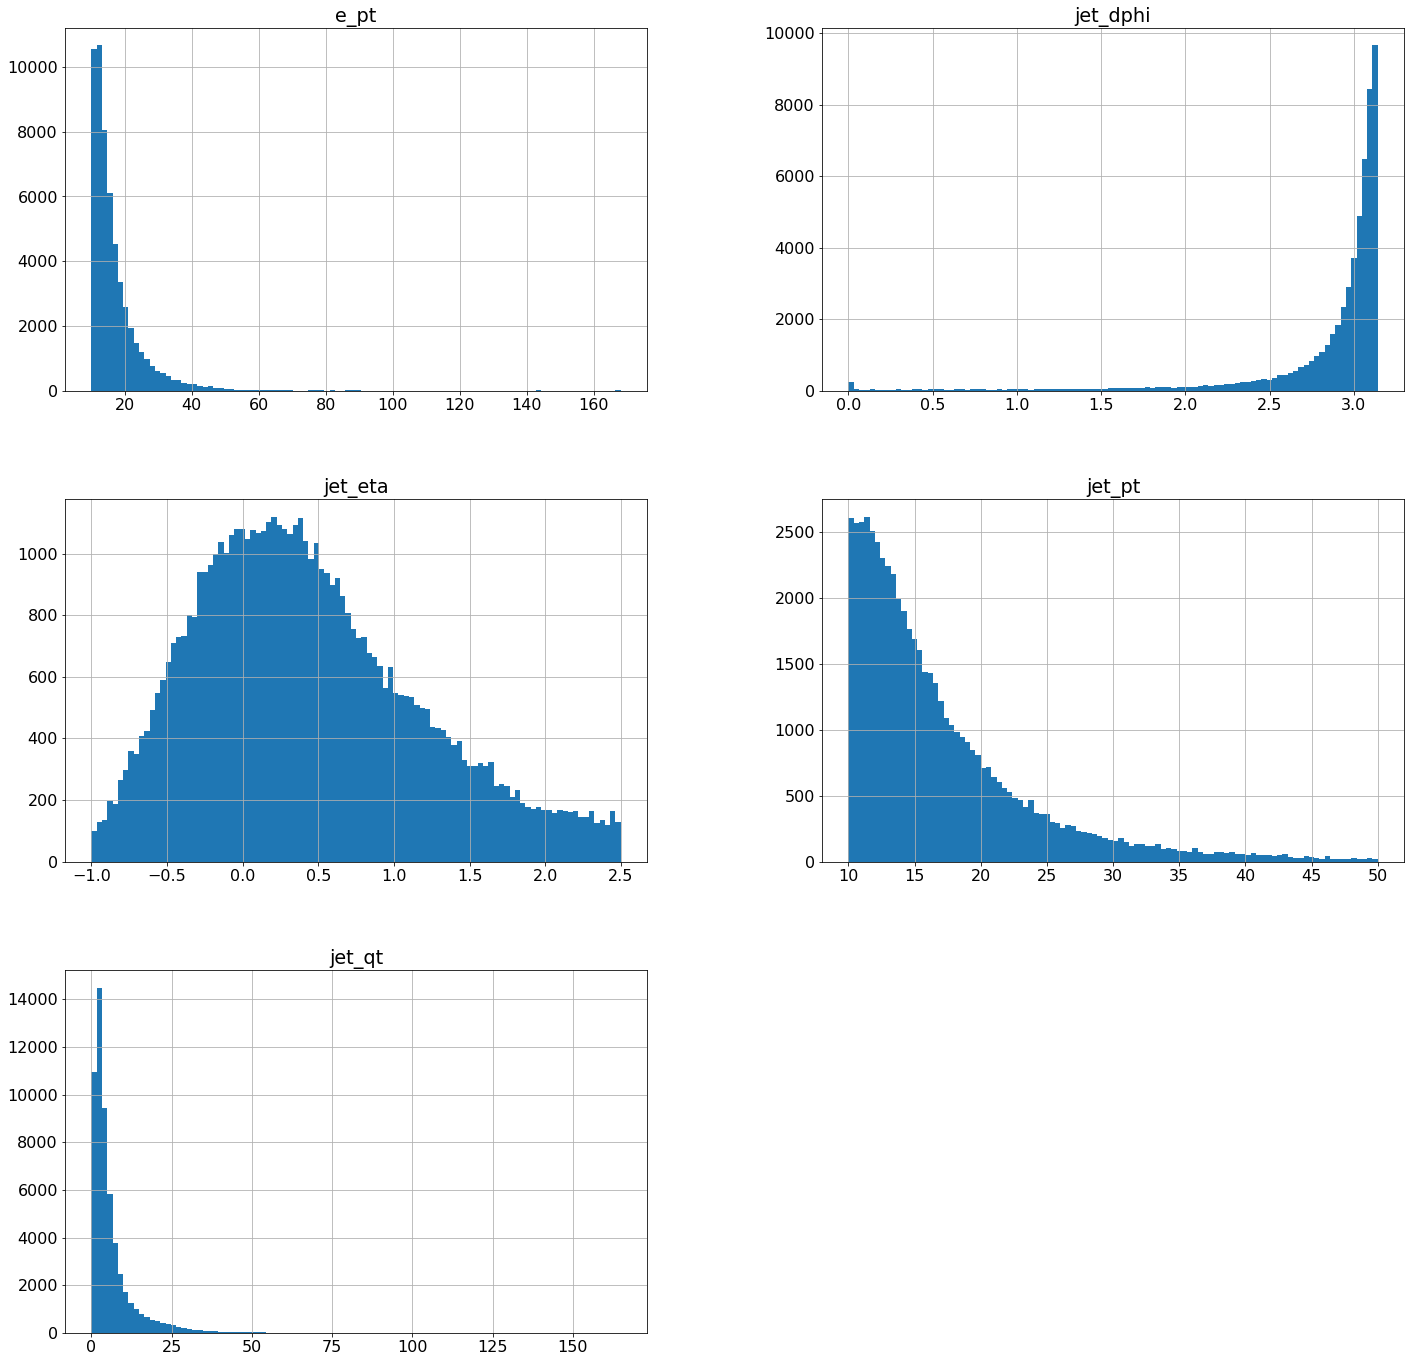

In [17]:
rc('text', usetex=False)
df_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()


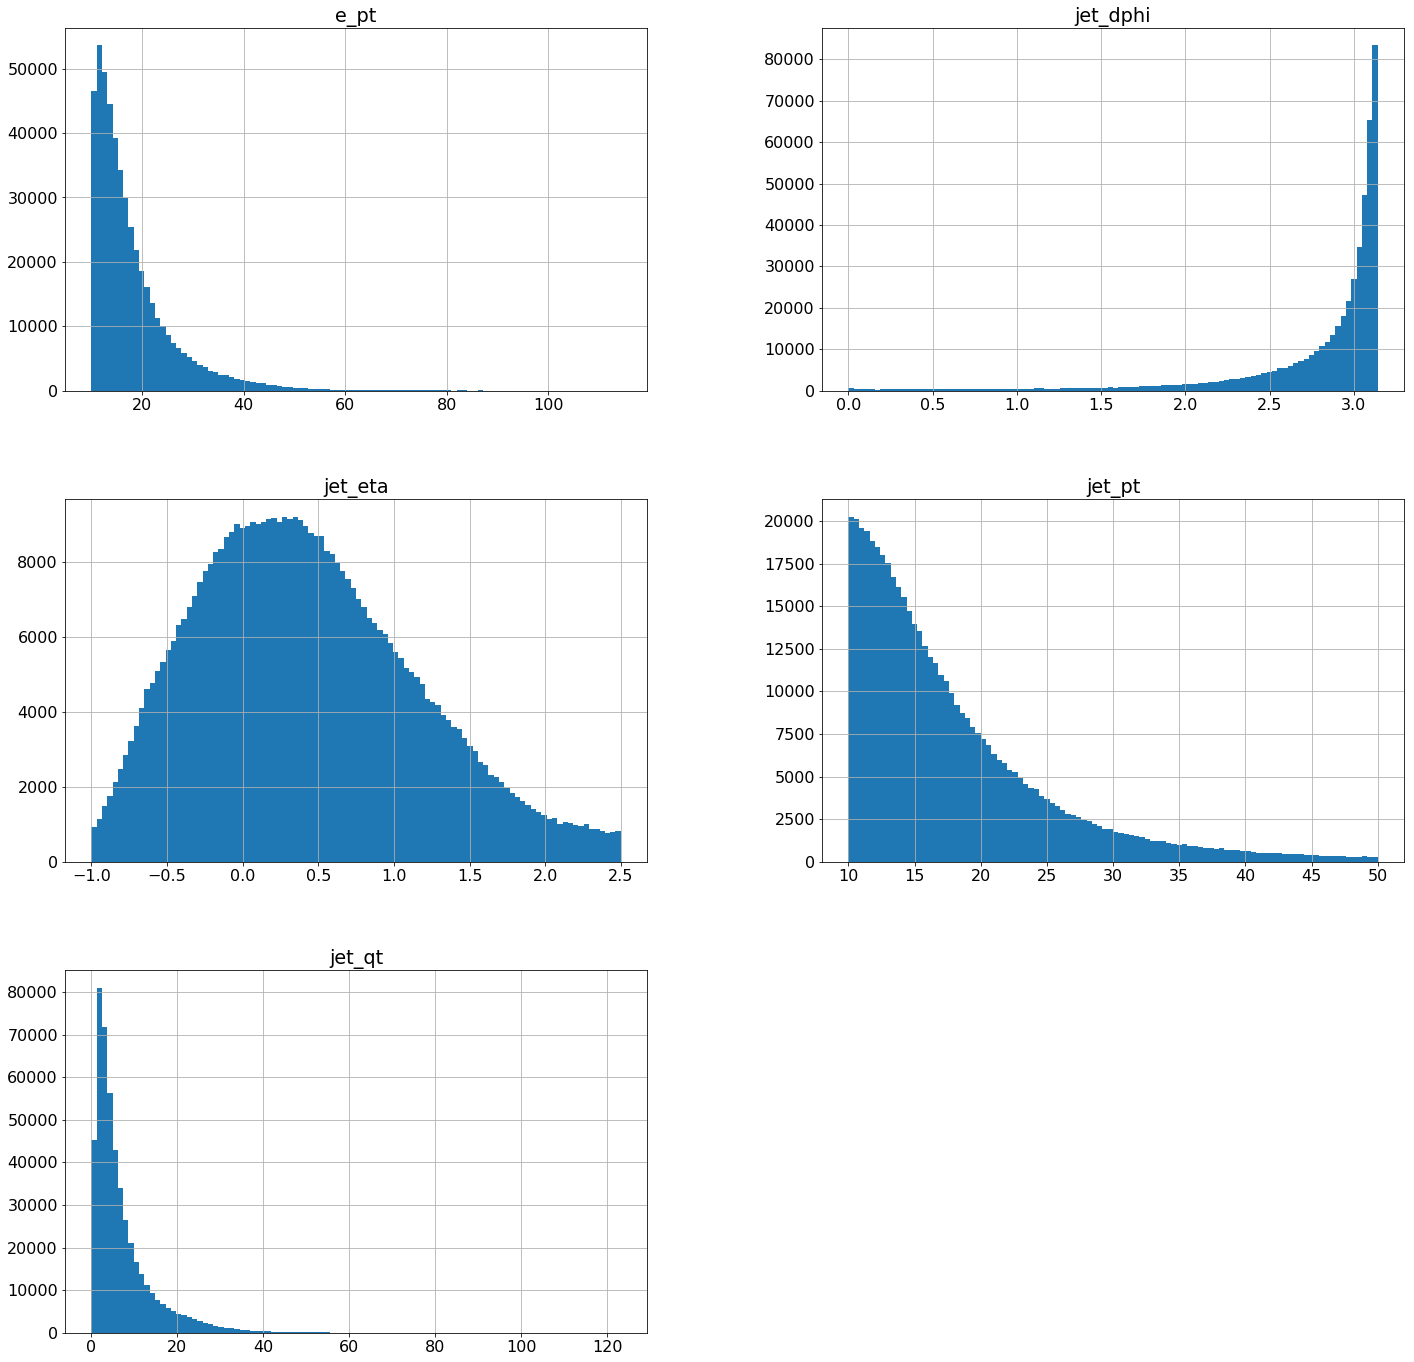

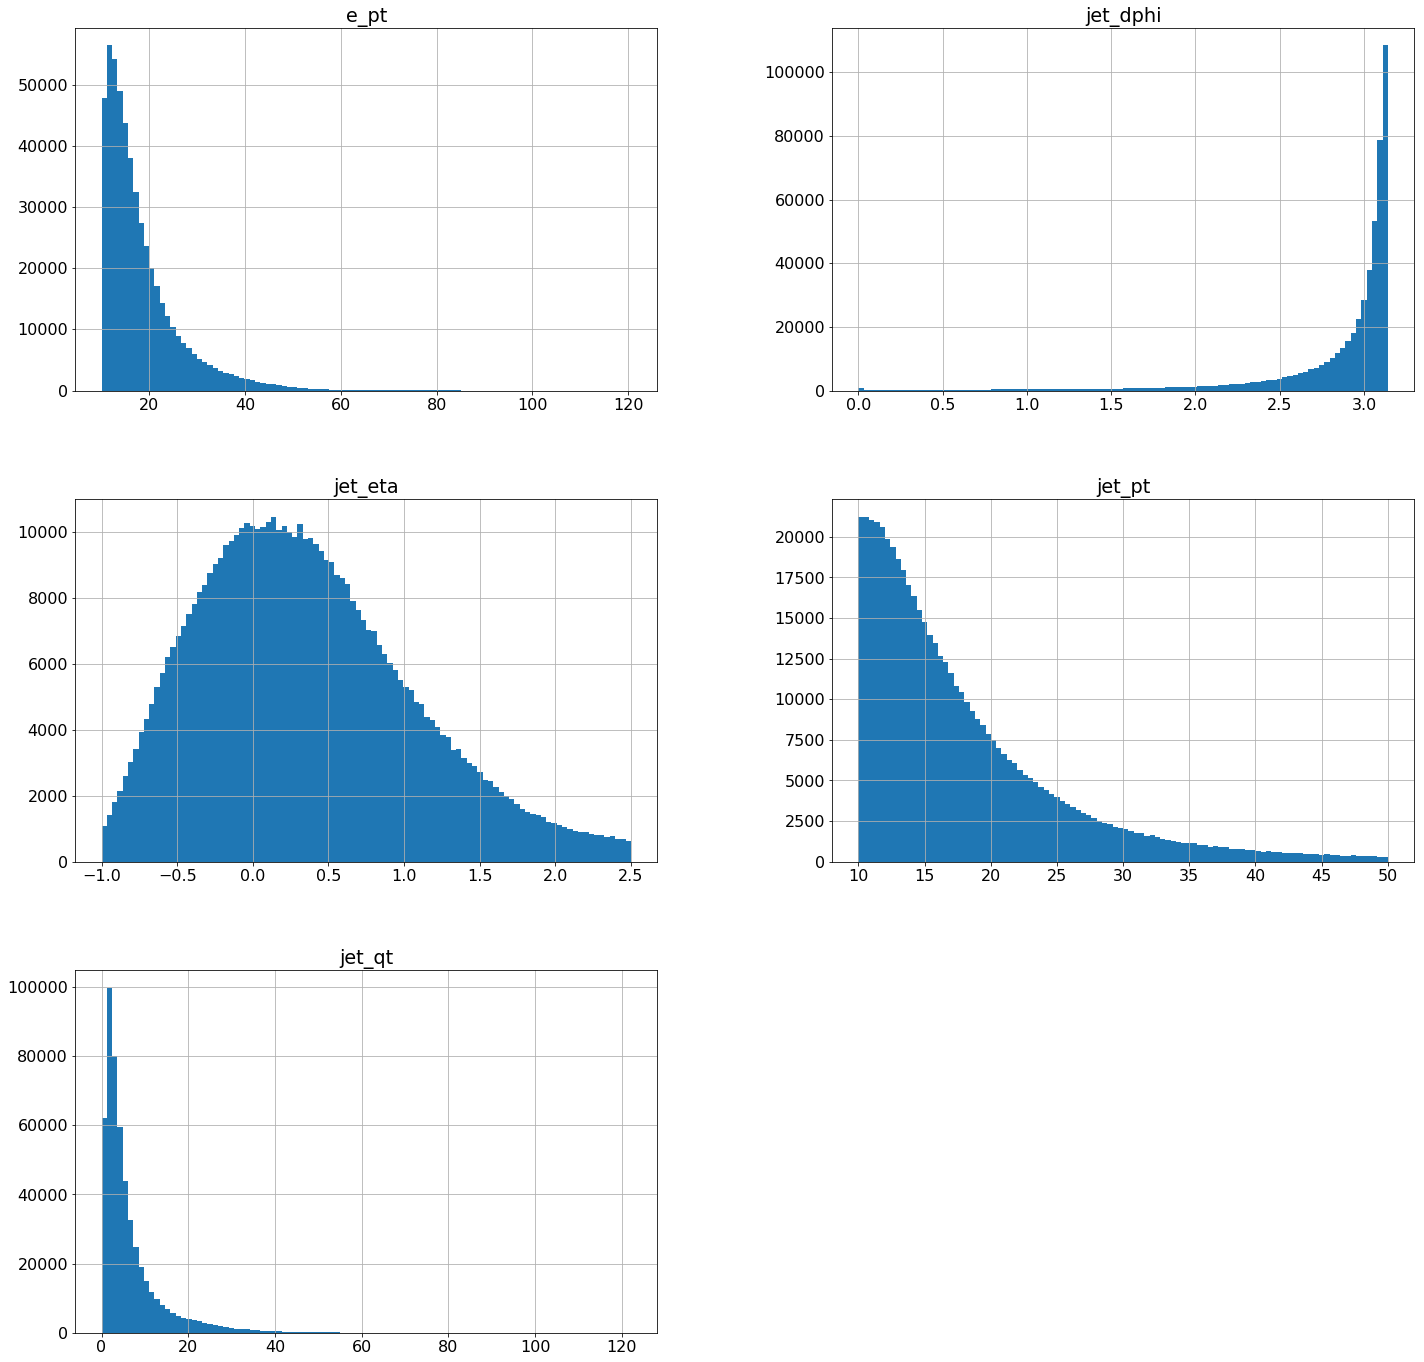

In [18]:
mc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()
altmc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()

## Peek into data format

In [19]:
df_jet.head()

,Q2,e_eta,jet_p,jet_eta,e_theta,jet_z,e_pt,jet_qt,jet_pt,e_p,x,y,vertex_z,jet_dphi,__array_index,jet_qtnormjetpt,jet_qtnormept
0,198.922607,-1.251570,11.451475,0.384256,2.584363,0.654356,12.606949,3.330789,10.655118,23.839008,0.009750,0.201020,4.185425,2.908192,0,0.312600,0.264203
1,1085.786377,0.077029,24.529739,0.511846,1.493844,0.338683,18.224974,3.994862,21.633492,18.279070,0.015413,0.694093,-1.840820,3.036616,0,0.184661,0.219197
2,1085.786377,0.077029,21.539669,0.956220,1.493844,0.144820,18.224974,26.163864,14.426210,18.279070,0.015413,0.694093,-1.840820,1.292843,1,1.813634,1.435605
3,1085.786377,0.077029,10.727878,-0.216850,1.493844,0.340029,18.224974,17.217634,10.480494,18.279070,0.015413,0.694093,-1.840820,1.961664,2,1.642827,0.944728
6,179.856400,-1.283487,12.356522,-0.150840,2.601014,1.119857,11.768281,0.877301,12.217270,22.867374,0.007705,0.229983,5.684937,3.078725,0,0.071808,0.074548


In [20]:
mc_jet.head()

,genjet_dphi,genjet_p,Q2,e_eta,jet_p,jet_eta,genjet_z,e_theta,jet_z,e_pt,...,genjet_pt,vertex_z,genjet_qt,y,jet_dphi,__array_index,jet_qtnormjetpt,jet_qtnormept,genjet_qtnormept,genjet_qtnormjetpt
0,2.940930,22.613100,308.923553,-0.988544,19.717886,0.445560,0.776283,2.429109,0.775893,15.039418,...,20.422804,7.566709,6.900935,0.267832,2.878709,0,0.288777,0.343905,0.458856,0.337903
4,0.929598,40.649517,153.432877,-1.312867,33.739868,1.695166,0.127611,2.615945,0.130932,10.331183,...,13.391321,17.961515,21.024010,0.304365,0.899648,0,1.677961,1.946303,2.035005,1.569973
5,3.070300,35.103764,153.432877,-1.312867,35.850460,1.806974,0.135601,2.615945,0.111976,10.331183,...,12.785501,17.961515,2.834609,0.304365,3.094193,1,0.108356,0.120205,0.274374,0.221705
6,3.070737,21.670870,769.722717,-0.103011,18.223198,-0.704221,0.937259,1.673625,0.769341,15.457251,...,16.841614,1.110400,1.540614,0.689594,3.024448,0,0.138460,0.129720,0.099669,0.091477
7,3.135317,12.214351,246.250061,-1.026446,11.023209,-0.407460,0.718916,2.453532,0.747390,12.451364,...,11.593664,7.572620,0.170724,0.370410,3.130736,0,0.224951,0.183689,0.013711,0.014726


## pT spectrum

Cross section [13118.83306061  9658.13288607  5664.39039659  3309.34097047
  1929.51006532  1091.8148763    628.19113136   363.5402797
   208.71668054   122.4738117     72.44644871]
Cross section [6503.24464362 5869.23211153 4611.37652708 3188.6218427  2120.41065808
 1297.96174105  746.91688067  426.4475632   241.59940285  143.90672875
   67.8909925 ]


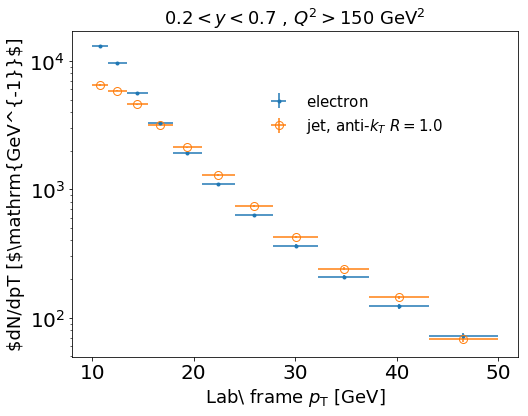

In [21]:
import seaborn as sns
nbins = 12
minpt = 10
maxpt = max(df_jet['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df.query('e_pt>5')['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


y, x  = np.histogram(df_jet.query('jet_pt>5')['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2

yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 
plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label='$\mathrm{jet}$, $\mathrm{anti}$-$k_{T}$ $R=1.0$')

plt.yscale('log')
ax1.set_xlabel(r'$\mathrm{Lab}$\ $\mathrm{frame}$ $p_{\mathrm{T}}$ $\mathrm{[GeV]}$' ,fontsize=18)
ax1.set_ylabel(r'$dN/dpT [$\mathrm{GeV^{-1}}$]', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 150\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

###Mean x vs pT
#ax2 = ax1.twinx()
#ax2.tick_params(axis='y', labelcolor='red')
#sns.regplot(df['e_pt'], df['x'], x_bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins),fit_reg=None,color='red')
#ax2.set_ylabel('Mean $x$' ,color='red',fontsize=16)
#plt.yticks(fontsize=18)
#plt.xticks(fontsize=18)
#ax2.set_ylim([0.0,1.0])
#ax2.scale('log')



plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

## DATA/MC comparisons

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


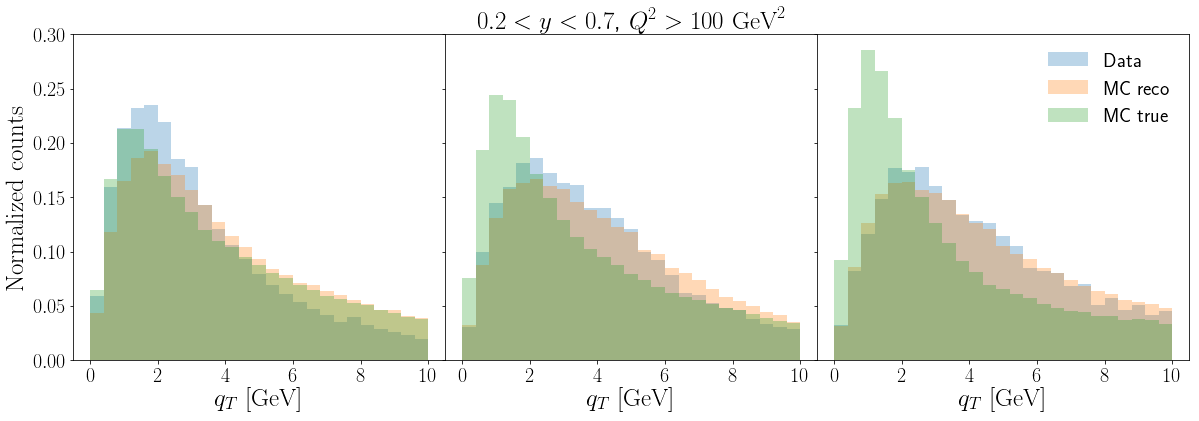

In [22]:
from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):
    #plot data
    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC reco')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC true')
    
    
    axs[counter].xaxis.set_label_text(r'$q_{T}$  $\mathrm{[GeV]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')

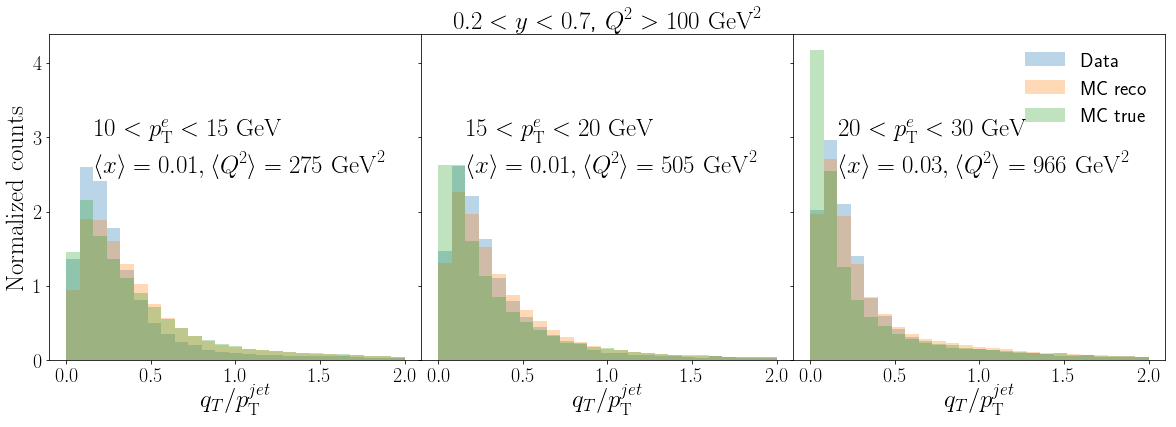

In [23]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormjetpt'],bins=25,range=(0,2),normed=True,alpha=0.3,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormjetpt'],bins=25,range=(0,2),normed=True,alpha=0.3, label='MC reco')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qtnormjetpt'],bins=25,range=(0,2),normed=True,alpha=0.3, label='MC true')
    

    axs[counter].xaxis.set_label_text(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,3, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].text(0.17,2.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.savefig('NC_LeptonJetqtoverjetpt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqtoverjetpt.pdf', bbox_inches='tight')

17.119783  mean lepton pt
0.36361292  mean inelasticity
23.658175  mean jet p
16.871462  mean jet pT
count    13828.000000
mean        16.871462
std          4.483511
min         10.000829
25%         13.709701
50%         16.285715
75%         19.188626
max         47.220043
Name: jet_pt, dtype: float64
0.013760645  mean x
488.50485  mean Q2
count    13828.000000
mean       488.504852
std        152.793015
min        281.507263
25%        380.050507
50%        454.405060
75%        551.991653
max       1270.057373
Name: Q2, dtype: float64
###########


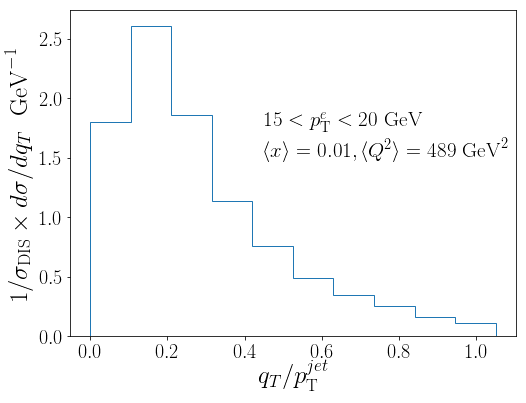

In [24]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut['jet_qtnormjetpt'],bins=10,range=(0,1.05),normed=True,histtype='step')    
plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.text(0.45,1.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

17.119783  mean lepton pt
0.36361292  mean inelasticity
23.658175  mean jet p
16.871462  mean jet pT
count    13828.000000
mean        16.871462
std          4.483511
min         10.000829
25%         13.709701
50%         16.285715
75%         19.188626
max         47.220043
Name: jet_pt, dtype: float64
0.013760645  mean x
488.50485  mean Q2
count    13828.000000
mean       488.504852
std        152.793015
min        281.507263
25%        380.050507
50%        454.405060
75%        551.991653
max       1270.057373
Name: Q2, dtype: float64
###########
11856
17.201097  mean lepton pt
0.3782348  mean inelasticity
22.824915  mean jet p
16.762989  mean jet pT
count    130195.000000
mean         16.762989
std           4.602489
min          10.000267
25%          13.439559
50%          16.112234
75%          19.161777
max          49.921566
Name: jet_pt, dtype: float64
0.013659327  mean x
504.9092  mean Q2
count    130195.000000
mean        504.909210
std         155.246246
min         281.

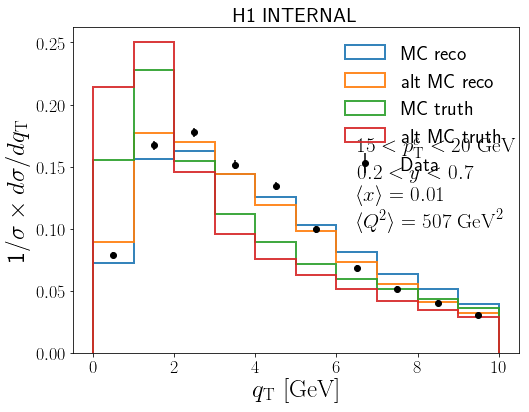

In [25]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = np.sum(y)
print integral 
y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, fmt='o',ls='none',label='Data',color='black')

#plot MC
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='alt MC reco',histtype='step',lw=2)
printSummary(df_cut)


df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC truth',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='alt MC truth',histtype='step',lw=2)
printSummary(df_cut)



plt.xlabel(r'$q_{\mathrm{T}} $ $\mathrm{[GeV]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


plt.text(6.5,0.10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()) + '$\n$'+ r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()), fontsize=21)


#plt.text(6.5,0.10, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, r'$\mathrm{H1}$ $\mathrm{INTERNAL}$', fontsize=28)

#plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('H1 INTERNAL', fontsize=21)
plt.savefig('H1_qtplot.png', bbox_inches='tight')
plt.savefig('H1_qtplot.pdf', bbox_inches='tight')

17.119783  mean lepton pt
0.36361292  mean inelasticity
23.658175  mean jet p
16.871462  mean jet pT
count    13828.000000
mean        16.871462
std          4.483511
min         10.000829
25%         13.709701
50%         16.285715
75%         19.188626
max         47.220043
Name: jet_pt, dtype: float64
0.013760645  mean x
488.50485  mean Q2
count    13828.000000
mean       488.504852
std        152.793015
min        281.507263
25%        380.050507
50%        454.405060
75%        551.991653
max       1270.057373
Name: Q2, dtype: float64
###########
12438.0
[2271 3430 2515 1613 1054  699  513  343]
[47.65501023 58.56620186 50.14977567 40.16217126 32.46536616 26.43860813
 22.64950331 18.52025918]
[0.18258562 0.27576781 0.20220293 0.12968323 0.08474031 0.05619875
 0.04124457 0.02757678]


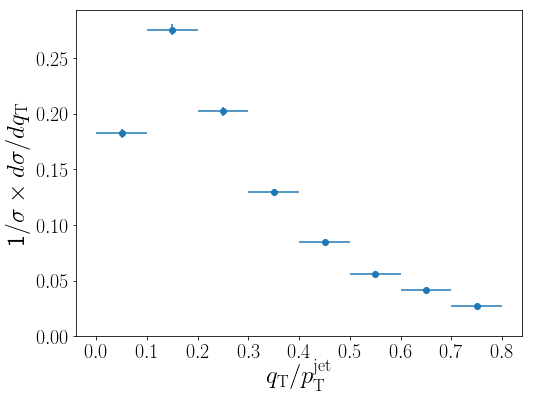

In [26]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=8,range=(0,0.80))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

In [ ]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormept'],bins=10,range=(0,1.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

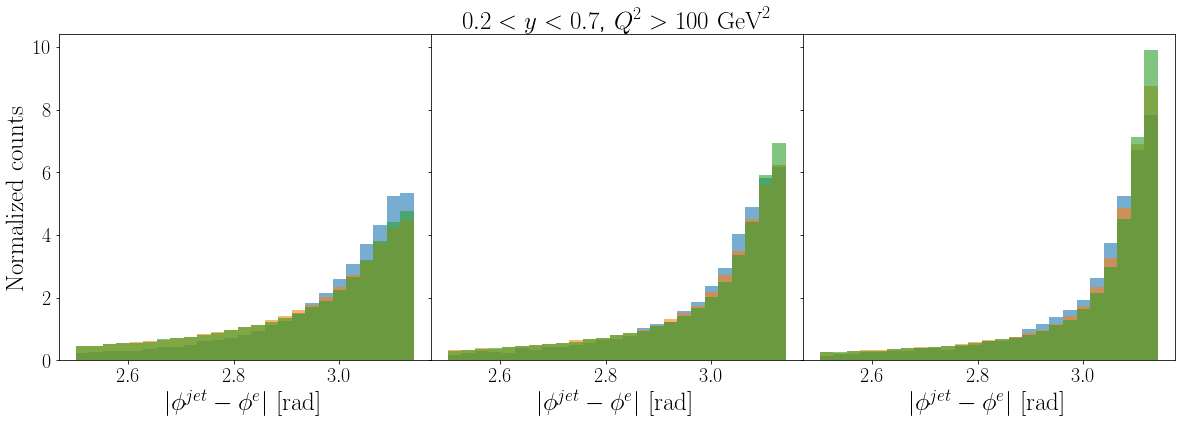

In [27]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    axs[counter].xaxis.set_label_text(r'$|\phi^{jet}-\phi^e|$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    #axs[counter].text(0.07,11, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetAzimuthal.pdf', bbox_inches='tight')

## Event variable

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 9 Text xticklabel objects>)

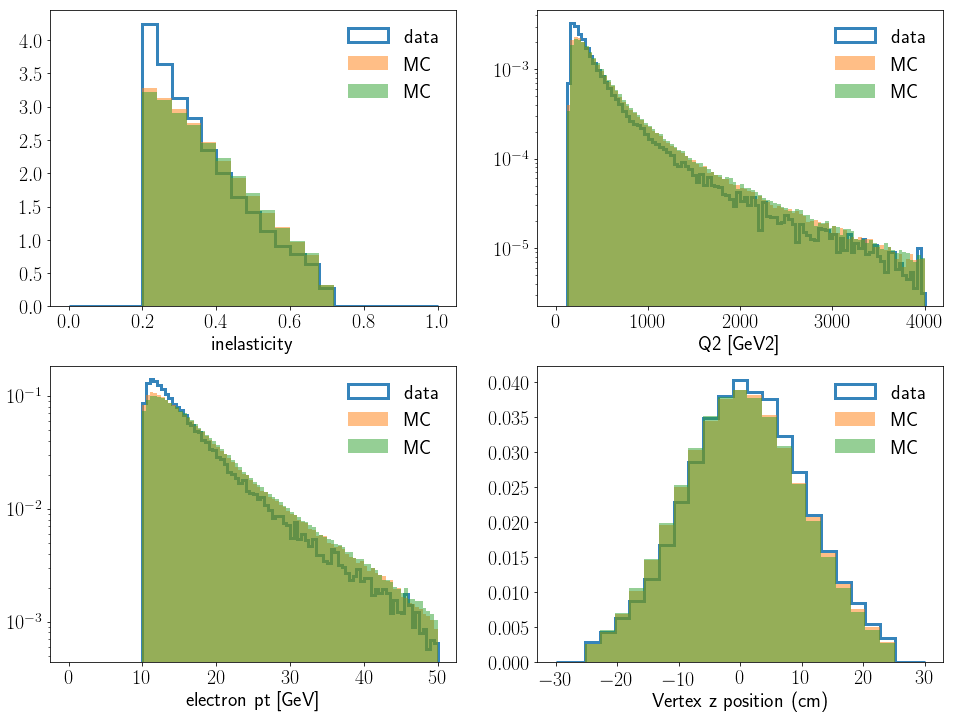

In [52]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y'],bins=25,normed=True,range=(0,1.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y'],bins=25,normed=True,range=(0,1.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['y'],bins=25,normed=True,range=(0,1.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.xlabel('Q2 [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.xlabel('electron pt [GeV]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')
plt.hist(altmc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

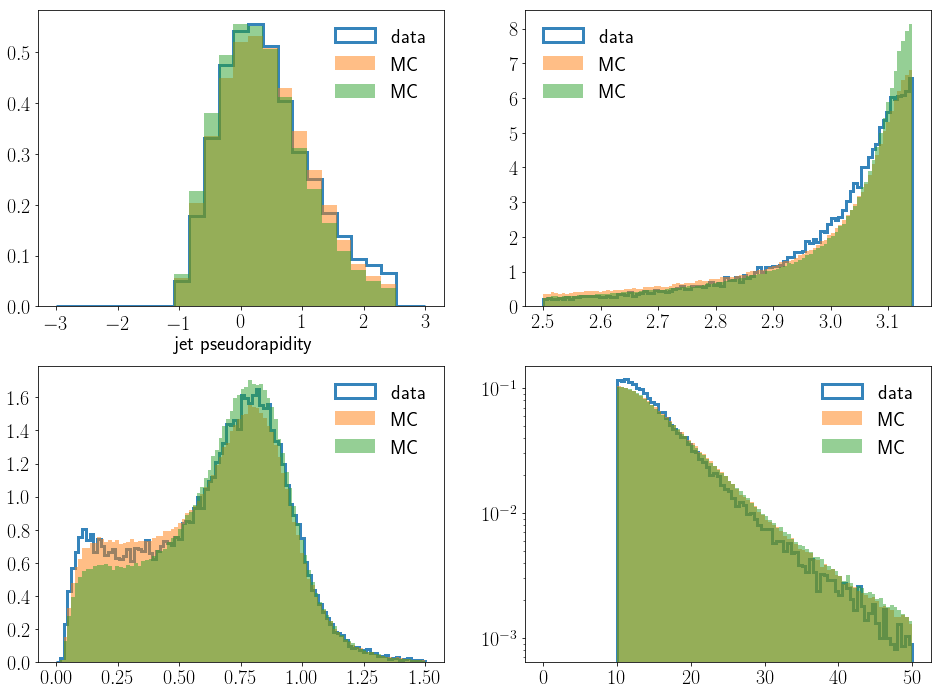

In [51]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('jet pseudorapidity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.5,label='MC')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.5,label='MC')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

## Azimuthal separation between lepton and jet

17.119783  mean lepton pt
0.36361292  mean inelasticity
23.658175  mean jet p
16.871462  mean jet pT
count    13828.000000
mean        16.871462
std          4.483511
min         10.000829
25%         13.709701
50%         16.285715
75%         19.188626
max         47.220043
Name: jet_pt, dtype: float64
0.013760645  mean x
488.50485  mean Q2
count    13828.000000
mean       488.504852
std        152.793015
min        281.507263
25%        380.050507
50%        454.405060
75%        551.991653
max       1270.057373
Name: Q2, dtype: float64
###########
11061.0
17.201097  mean lepton pt
0.3782348  mean inelasticity
22.824915  mean jet p
16.762989  mean jet pT
count    130195.000000
mean         16.762989
std           4.602489
min          10.000267
25%          13.439559
50%          16.112234
75%          19.161777
max          49.921566
Name: jet_pt, dtype: float64
0.013659327  mean x
504.9092  mean Q2
count    130195.000000
mean        504.909210
std         155.246246
min         28

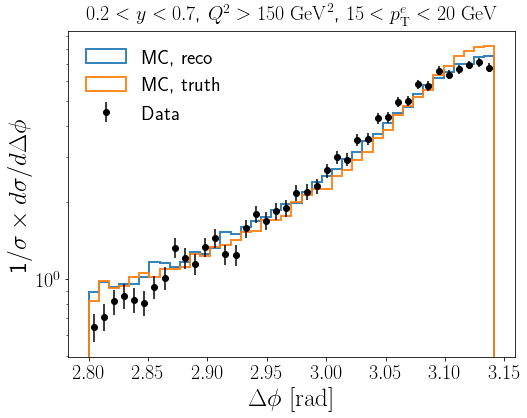

In [41]:
rc('text', usetex=True)
fig = plt.figure(figsize=(8,6))
df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

mindphi = 2.8
nbins = 40
y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
integral = np.sum(y)
print 1.0*integral 
y = y/width
erry = erry/width
y = np.true_divide(y,integral)
erry= np.true_divide(erry,integral)

plt.errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')




    
    #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
printSummary(df_cut)
    
        #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
axs[counter].hist(df_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
printSummary(df_cut)
    

        #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
printSummary(df_cut)
    





plt.xlabel(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/d\Delta\phi}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
 #                   r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.title('$0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$, $15<p_{\mathrm{T}}^{e}<20$ $\mathrm{GeV}$',fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_deltaphi.png', bbox_inches='tight')
plt.savefig('H1_deltaphi.pdf', bbox_inches='tight')
plt.yscale('log')
plt.savefig('H1_deltaphi_log.png', bbox_inches='tight')
plt.savefig('H1_deltaphi_log.pdf', bbox_inches='tight')

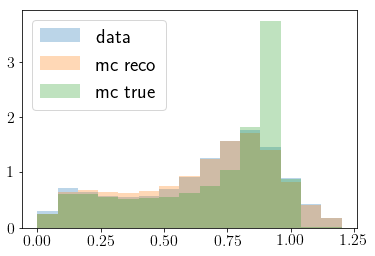

In [33]:
df_cut = df_jet.query('Q2>500')
plt.hist(df_cut['jet_z'],bins=15,range = (0,1.2),alpha=0.3, normed=True,label='data')

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['jet_z'],bins=15,range = (0,1.2),alpha=0.3, normed=True, label='mc reco')

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['genjet_z'],bins=15,range = (0,1.2),alpha=0.3, normed=True, label='mc true')

plt.legend()

(array([1.72673726, 2.90000437, 2.48608889, 1.93082694, 1.47137867,
        1.1402829 , 0.91351746, 0.76266839, 0.63386863, 0.51358442,
        0.43954939, 0.35699943, 0.30053233, 0.25213141, 0.2055234 ,
        0.1726289 , 0.14215443, 0.1214496 , 0.10280662, 0.09393297]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 ],
       dtype=float32),
 <a list of 20 Patch objects>)

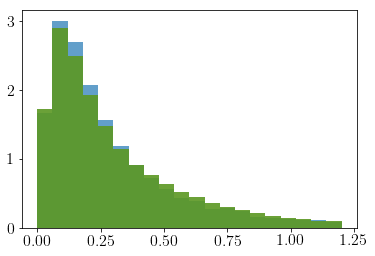

In [34]:
df_cut = df_jet.query('Q2>500')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

## Azimuthal separation between lepton and jet for various electron pT ranges/'

###########
12426.0
17.201097  mean lepton pt
0.3782348  mean inelasticity
22.824915  mean jet p
16.762989  mean jet pT
count    130195.000000
mean         16.762989
std           4.602489
min          10.000267
25%          13.439559
50%          16.112234
75%          19.161777
max          49.921566
Name: jet_pt, dtype: float64
0.013659327  mean x
504.9092  mean Q2
count    130195.000000
mean        504.909210
std         155.246246
min         281.324127
25%         393.656906
50%         470.462463
75%         572.625916
max        1322.431519
Name: Q2, dtype: float64
17.201097  mean lepton pt
0.3782348  mean inelasticity
22.824915  mean jet p
16.762989  mean jet pT
count    130195.000000
mean         16.762989
std           4.602489
min          10.000267
25%          13.439559
50%          16.112234
75%          19.161777
max          49.921566
Name: jet_pt, dtype: float64
0.013659327  mean x
504.9092  mean Q2
count    130195.000000
mean        504.909210
std         155.246246


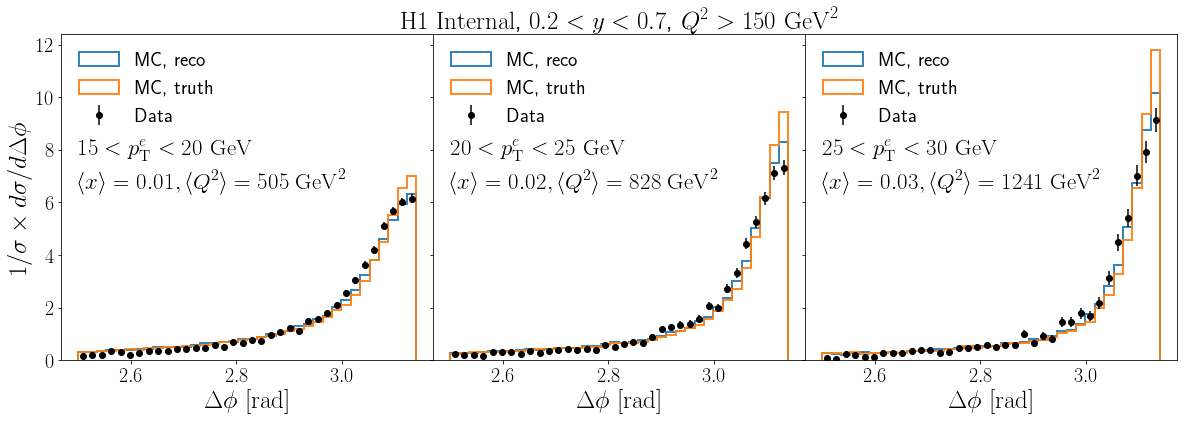

In [43]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

nbins = 36
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    printSummary(df_cut)
    
        #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=nbins,range=(2.5,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    printSummary(df_cut)
    
    
    
    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(2.5,6.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

## qT distribution


###########
11856.0
17.206696  mean lepton pt
0.38056615  mean inelasticity
21.85135  mean jet p
16.743536  mean jet pT
count    142748.000000
mean         16.743536
std           4.452002
min          10.000053
25%          13.598300
50%          16.165432
75%          18.999250
max          49.970631
Name: jet_pt, dtype: float64
0.013628633  mean x
507.0558  mean Q2
count    142748.000000
mean        507.055786
std         155.427719
min         282.020386
25%         396.203812
50%         472.481140
75%         574.324234
max        1321.499756
Name: Q2, dtype: float64
17.206696  mean lepton pt
0.38056615  mean inelasticity
21.85135  mean jet p
16.743536  mean jet pT
count    142748.000000
mean         16.743536
std           4.452002
min          10.000053
25%          13.598300
50%          16.165432
75%          18.999250
max          49.970631
Name: jet_pt, dtype: float64
0.013628633  mean x
507.0558  mean Q2
count    142748.000000
mean        507.055786
std         155.427719


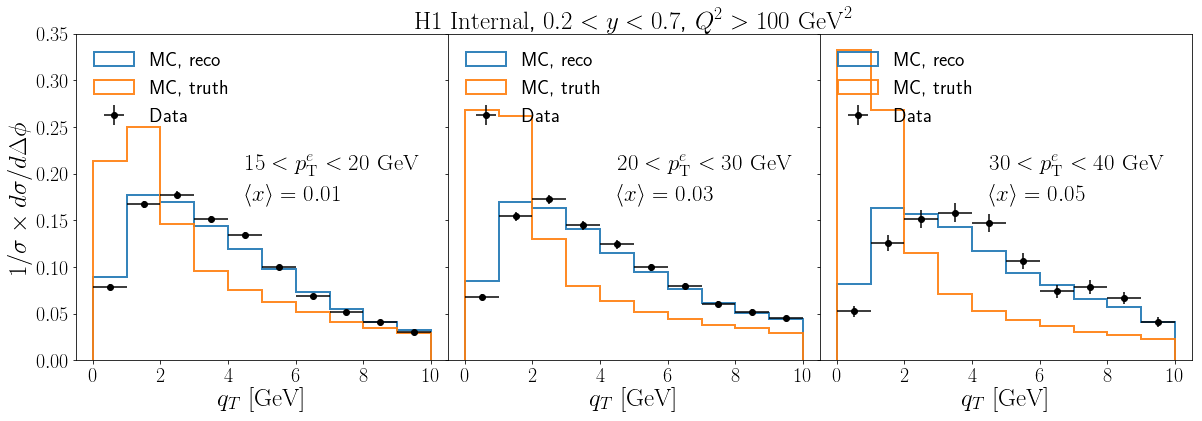

In [36]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,30),(30,40)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    #y = y/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    printSummary(df_cut)
    
    #plot mc
    df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{T}$ $\mathrm{[GeV]}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')

    axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqt.png', bbox_inches='tight')
plt.savefig('H1_Leptonqt.pdf', bbox_inches='tight')

###########
12974.0
17.201097  mean lepton pt
0.3782348  mean inelasticity
22.824915  mean jet p
16.762989  mean jet pT
count    130195.000000
mean         16.762989
std           4.602489
min          10.000267
25%          13.439559
50%          16.112234
75%          19.161777
max          49.921566
Name: jet_pt, dtype: float64
0.013659327  mean x
504.9092  mean Q2
count    130195.000000
mean        504.909210
std         155.246246
min         281.324127
25%         393.656906
50%         470.462463
75%         572.625916
max        1322.431519
Name: Q2, dtype: float64
17.201097  mean lepton pt
0.3782348  mean inelasticity
22.824915  mean jet p
16.762989  mean jet pT
count    130195.000000
mean         16.762989
std           4.602489
min          10.000267
25%          13.439559
50%          16.112234
75%          19.161777
max          49.921566
Name: jet_pt, dtype: float64
0.013659327  mean x
504.9092  mean Q2
count    130195.000000
mean        504.909210
std         155.246246


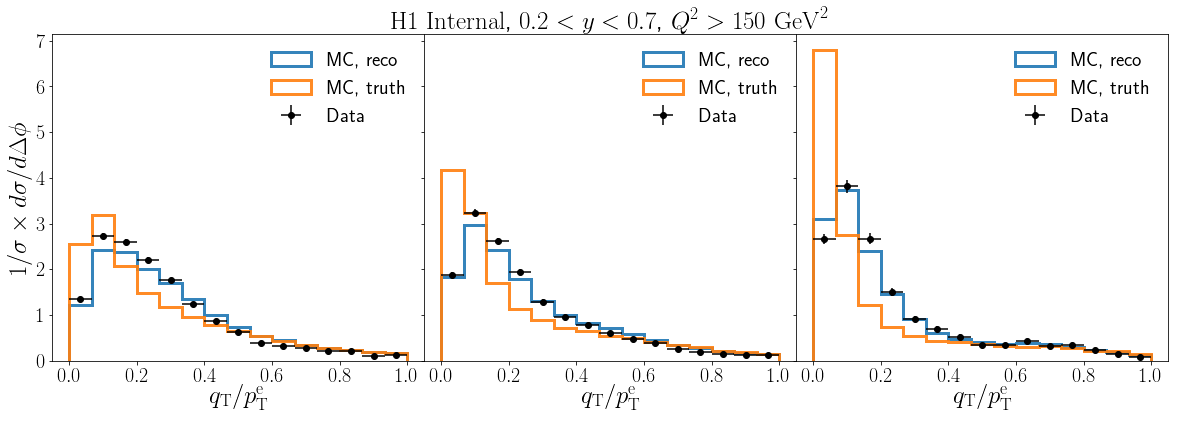

In [37]:


from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

maxrange = 1.0
nbins = 15
for counter,edges in enumerate([(15,20), (20,30),(30,50)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=3)
    printSummary(df_cut)
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=3)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='best')

    #axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
     #                 r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqtnormed_ept.png', bbox_inches='tight')
plt.savefig('H1_Leptonqtnormed_ept.pdf', bbox_inches='tight')

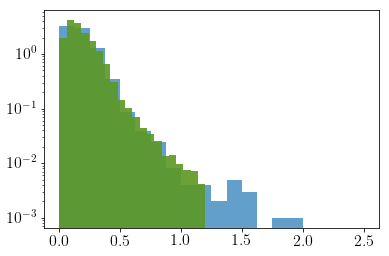

In [38]:
df_cut = df_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,2.5),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)
plt.yscale('log')

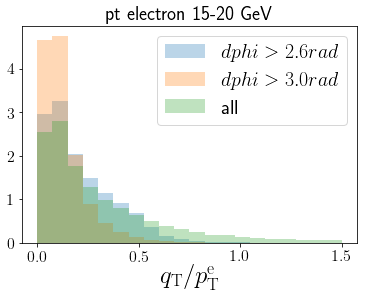

In [39]:
df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>2.6')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='$dphi>2.6 rad$')

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='$dphi>3.0 rad$')

df_cut = mc_jet.query('e_pt>15 and e_pt<20')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='all')
plt.title('pt electron 15-20 GeV')
plt.legend(loc='best',fontsize=20)
plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)

#plt.yscale('log')